## Kaggle score: 
- v1: alpha:0.4 = 91591
- v1: alpha:1 = 21748
- v2: alpha:0.1 = 14805
- v2: alpha:0.05 = 14496
- v2: alpha:2 = 14440
- v2_2: alpha:0.3 = 14340
- v2_2: alpha:1  = 14288 (best)
- v3: alpha:1 = 14865


# Libraries

In [101]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge

In [102]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/train_fe_v2_2.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/test_fe_v2_2.csv')

# Fit model

# Define predictors and target

In [103]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0' ])
x = train[x_columns].values
y = train['SalePrice'].values
x_columns



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'GarageFinish4', 'TotRmsAbvGrd2', 'TotRmsAbvGrd3', 'TotRmsAbvGrd4',
       'FireplaceQu2', 'FireplaceQu3', 'FireplaceQu4', 'YearBuilt2',
       'YearBuilt3', 'YearBuilt4'],
      dtype='object', length=114)

## Split data

In [104]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

# Model

In [105]:
# fe v2_2
# The analysis at the bottom show that the best regularization parameter is alpha = 0.03 for R2
# For KAggle, different values like alpha = 1 gave better results

#fe v2_3

model = Ridge(alpha=1.5)

model.fit(x_train,y_train)

Ridge(alpha=1.5)

In [106]:
y_pred = model.predict(x_test)
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [107]:
print(f'R2 = {round(R2,3)} and MAE = {round(MAE,3)}')

R2 = 0.922 and MAE = 15122.052


In [108]:
np.mean(model.coef_**2)/1000000000

0.2481245070786791

# Making predictions

In [110]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,GarageFinish4,TotRmsAbvGrd2,TotRmsAbvGrd3,TotRmsAbvGrd4,FireplaceQu2,FireplaceQu3,FireplaceQu4,YearBuilt2,YearBuilt3,YearBuilt4
0,0,1461,0.785714,0.50,0.255591,0.054322,1.0,1.0,0.000000,0.333333,...,0.012346,0.173611,0.072338,0.030141,0.04,0.008,0.0016,0.353077,0.209799,0.124663
1,1,1462,0.785714,0.75,0.258786,0.066685,1.0,1.0,0.333333,0.333333,...,0.012346,0.250000,0.125000,0.062500,0.04,0.008,0.0016,0.327715,0.187605,0.107397
2,2,1463,1.000000,0.75,0.236422,0.064643,1.0,1.0,0.333333,0.333333,...,1.000000,0.250000,0.125000,0.062500,0.36,0.216,0.1296,0.731149,0.625185,0.534579
3,3,1464,1.000000,0.75,0.249201,0.046638,1.0,1.0,0.333333,0.333333,...,1.000000,0.340278,0.198495,0.115789,0.64,0.512,0.4096,0.743594,0.641215,0.552932
4,4,1465,0.928571,0.75,0.137380,0.023394,1.0,1.0,0.333333,1.000000,...,0.197531,0.173611,0.072338,0.030141,0.04,0.008,0.0016,0.670500,0.549033,0.449570


In [111]:
x_ids = test['Id']
test_columns = test.columns.drop(['Unnamed: 0','Id'])
x_test_2 = test[test_columns].values

x_ids


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [112]:
y_pred_2 = model.predict(x_test_2)

final=pd.DataFrame(data={'Id':x_ids,'SalePrice':y_pred_2})
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [113]:
# Run the code to save predictions in the format used for competition scoring

final.to_csv('../submissions/submission_regression_v1_2_2.csv',index=False)

## Test values vs Test predictions

In [49]:
plot_test = pd.DataFrame(data={'OverallQual':x_test[:,16],'SalePrice':y_test})
plot_test_predictions = pd.DataFrame(data={'OverallQual':x_test[:,16],'SalePrice':y_pred})

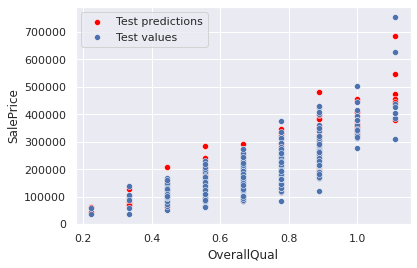

In [50]:
sns.scatterplot(x=plot_test_predictions['OverallQual'],y=plot_test_predictions['SalePrice'],color="red");
sns.scatterplot(x=plot_test['OverallQual'],y=plot_test['SalePrice']);
plt.legend(['Test predictions','Test values'])
plt.savefig('test_vs_test_pred.png')

## Train vs Test predictions

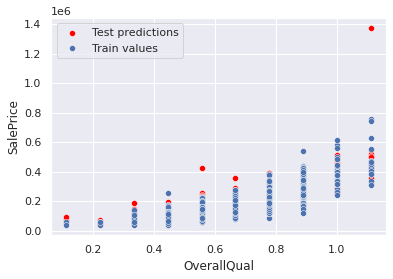

In [51]:
sns.scatterplot(x=test['OverallQual'],y=final['SalePrice'],color="red");
sns.scatterplot(x=train['OverallQual'],y=train['SalePrice']);
plt.legend(['Test predictions','Train values'])
plt.savefig('train_vs_test_pred.png')

## mean R2

0.9170694879668702


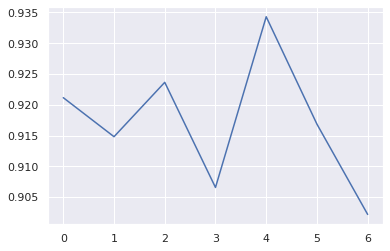

In [52]:
R2s = list()
MAEs = list()
for i in range(3,10):
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=i)
    # start model 
    model = Ridge(alpha=0.4)
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
plt.plot(R2s)
print(np.mean(R2s))

# Looking for the best regularization parameter

0.01: 0.9266567165374398
0.03: 0.9257462759280933
0.1: 0.9245872280475097
0.3: 0.9238255423303733
1: 0.9227136409236545
3: 0.9200515852289307
10: 0.9127955398997717
30: 0.8995199421914197


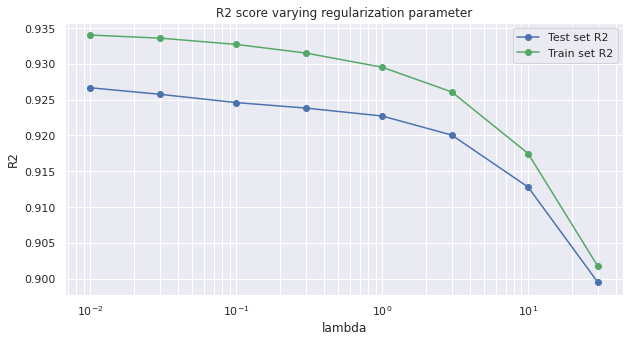

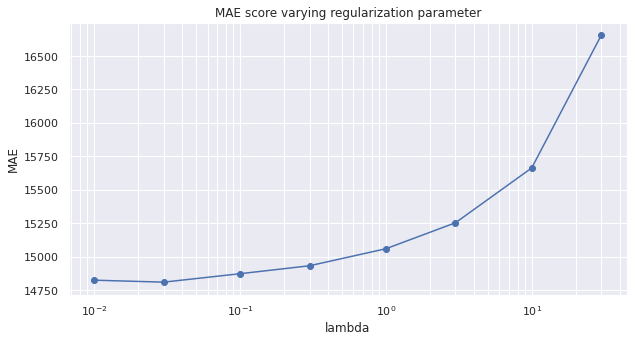

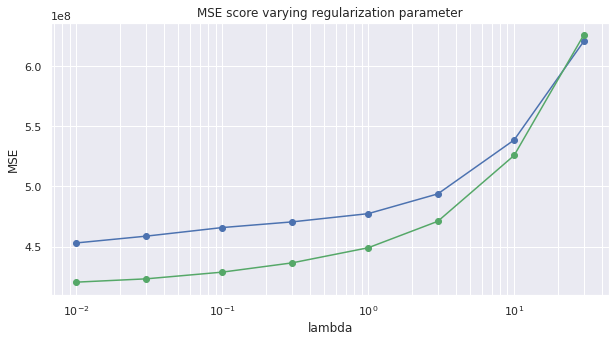

In [58]:
# spliting data
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

lambdas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] 

R2s = list()
R2s_train = list()
MAEs = list()
MSEs = list()
MSEs_train = list()

for i in lambdas:
    #model
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    #metrics
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    R2_train = r2_score(y_train, y_pred_train)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    R2s.append(R2)
    R2s_train.append(R2_train)
    MAEs.append(MAE)
    MSEs.append(MSE)
    MSEs_train.append(MSE_train)
    print(f'{i}: {R2}')
    
# Plot R2
plt.figure(figsize=(10,5));    
plt.plot(lambdas,R2s,'-bo',
         lambdas,R2s_train,'-go');
plt.xlabel("lambda");
plt.ylabel("R2");
plt.title("R2 score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();
plt.legend(['Test set R2','Train set R2'])
plt.savefig('R2=f(regularization).png')

# Plot MAEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MAEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MAE");
plt.title("MAE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MSEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MSEs,'-bo',
        lambdas,MSEs_train,'-go');
plt.xlabel("lambda");
plt.ylabel("MSE");
plt.title("MSE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

0.92487827419876


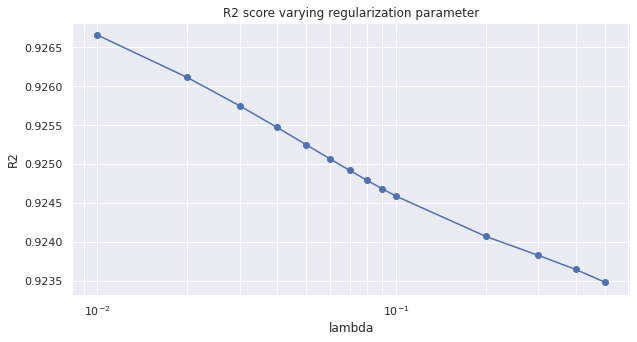

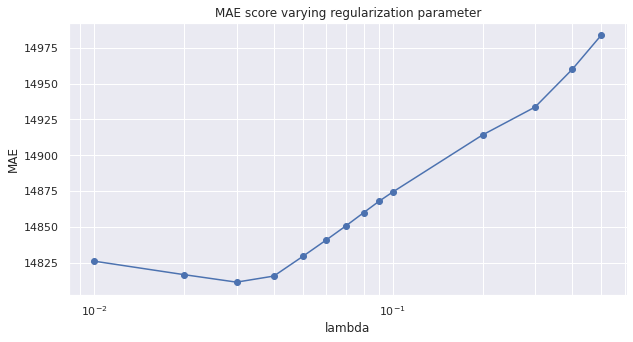

In [56]:
# spliting data
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.4, random_state=5)

lambdas = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5] 

R2s = list()
MAEs = list()
MSEs = list()

for i in lambdas:
    #model
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    #metrics
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

print(np.mean(R2s))
    
# Plot R2
plt.figure(figsize=(10,5));    
plt.plot(lambdas,R2s,'-o');
plt.xlabel("lambda");
plt.ylabel("R2");
plt.title("R2 score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Plot MAEs
plt.figure(figsize=(10,5));
plt.plot(lambdas,MAEs,'-o');
plt.xlabel("lambda");
plt.ylabel("MAE");
plt.title("MAE score varying regularization parameter");
plt.grid(True, which="both", ls="-");
plt.semilogx();

# Learn curves

## alpha = 0.01

In [91]:
J_trains = list()
J_tests = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in range(100,1410,10):
    # start model 
    model = Ridge(alpha=0.01)
    # fit model
    model.fit(x_train[0:i,:],y_train[0:i])
    # predictions
    y_pred_train = model.predict(x_train[0:i,:])
    y_pred_test = model.predict(x_test[0:i,:])
    J_train = mean_squared_error(y_train[0:i],y_pred_train[0:i])
    J_test = mean_squared_error(y_test[0:i],y_pred_test[0:i])
    J_trains.append(J_train)
    J_tests.append(J_test)


In [92]:
(J_tests[-1]-J_trains[-1])/10000000

3.2629044005773604

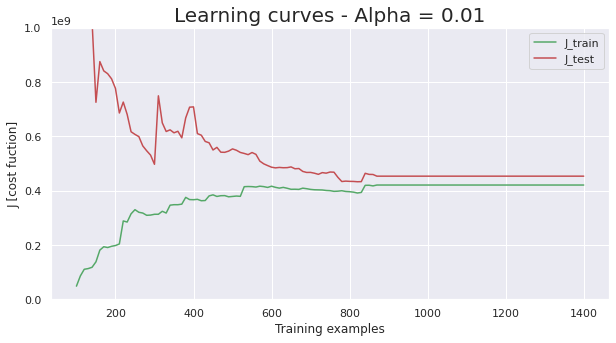

In [93]:
x1 = np.array(range(100,1410,10))

plt.figure(figsize=(10,5));

plt.plot(x1,J_trains,'g',
        x1,J_tests,'r');

plt.xlabel("Training examples");
plt.ylabel("J [cost fuction]");
plt.legend(['J_train','J_test']);
plt.title("Learning curves - Alpha = 0.01", fontsize=20);
plt.ylim(0,1000000000);
plt.savefig('learning_curves_Alpha_0.01.png')

## alpha=1

In [94]:
J_trains = list()
J_tests = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in range(100,1410,10):
    # start model 
    model = Ridge(alpha=1)
    # fit model
    model.fit(x_train[0:i,:],y_train[0:i])
    # predictions
    y_pred_train = model.predict(x_train[0:i,:])
    y_pred_test = model.predict(x_test[0:i,:])
    J_train = mean_squared_error(y_train[0:i],y_pred_train[0:i])
    J_test = mean_squared_error(y_test[0:i],y_pred_test[0:i])
    J_trains.append(J_train)
    J_tests.append(J_test)


In [95]:
(J_tests[-1]-J_trains[-1])/10000000

2.8380090786429166

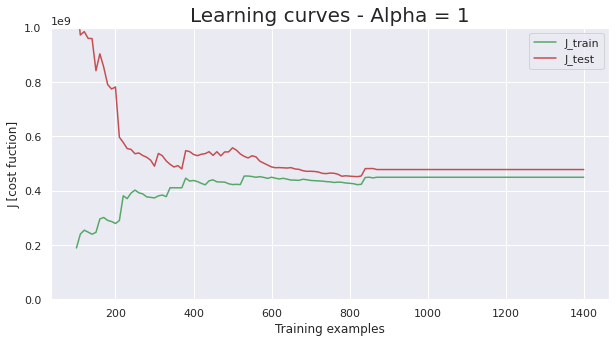

In [96]:
x1 = np.array(range(100,1410,10))

plt.figure(figsize=(10,5));

plt.plot(x1,J_trains,'g',
        x1,J_tests,'r');

plt.xlabel("Training examples");
plt.ylabel("J [cost fuction]");
plt.legend(['J_train','J_test']);
plt.title("Learning curves - Alpha = 1", fontsize=20);
plt.ylim(0,1000000000);
plt.savefig('learning_curves_Alpha_1.png')

lower regularization parameter gives higher variance, hence more error in Kaggle

In [97]:
lambdas = [i/100 for i in range(1,101,1)]
coefs = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in lambdas:
    # start model 
    model = Ridge(alpha=i)
    # fit model
    model.fit(x_train,y_train)
    # predictions
    coefs.append(np.mean(model.coef_**2)/1000000000)

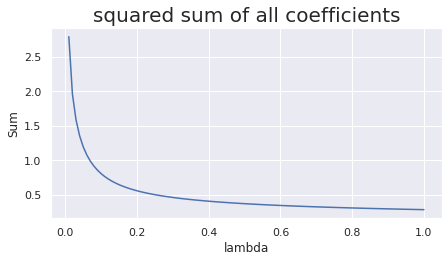

In [100]:
plt.figure(figsize=(7,3.5));
plt.plot(lambdas,coefs);

plt.xlabel("lambda");
plt.ylabel("Sum");
plt.title("squared sum of all coefficients", fontsize=20);
plt.savefig('coefs_lambda.png')